In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [15]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]

#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA
pca = PCA(2)
mat_reduced = pca.fit_transform(x)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

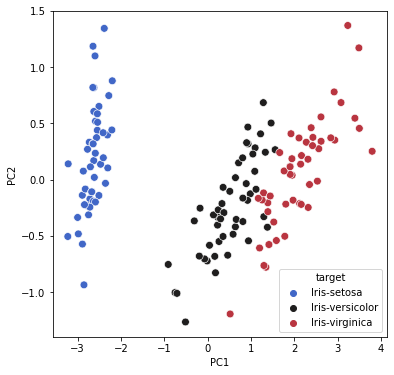

In [3]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

# PCA from scratch

In [1]:
import numpy as np

class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        X = X - X.mean(axis=0)
        eigenValues, eigenVectors = np.linalg.eig(np.cov(X.T))
        idx = eigenValues.argsort()[::-1]  
        eigenValues = eigenValues[idx]
        eigenVectors = eigenVectors[:,idx]
        self.eigenVectors = eigenVectors[:,:self.n_components]
        self.eigenVectors[:,1] *= -1
        
    def transform(self, X):
        X = X - X.mean(axis=0)
        return np.dot(X, self.eigenVectors)

In [ ]:
pca = PCA(n_components=2)
pca.fit(x)
df = pca.transform(x)

principal_df = pd.DataFrame(df , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

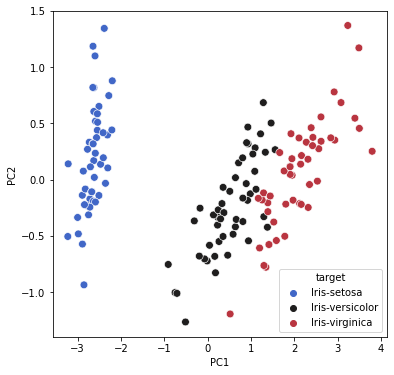

In [74]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')

# Using PCA on MNIST dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target

In [ ]:
# for different number of componentns apply PCA to X
# use logistic regression with param C tuning
# check accuracy on test, time needed for transforming data and fitting the model via cross validation 5 folds
# create a table as shown below (number of components in the table are not mandatory to use)
# you can apply some scalings to the dataset if you find it neccessary

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import time

In [2]:
######## n_components = 1

In [63]:
n_components = 1

start = time.time()
pca = PCA(n_components)
X_transformed = pca.fit_transform(X)
transformation_time = time.time() - start

print(X_transformed.shape)

transformation_time

(70000, 1)


1.144719123840332

In [6]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]}

clf = GridSearchCV(LogisticRegression(penalty='l2', max_iter=5000), param_grid, cv=None, n_jobs=-1, verbose=1)

clf = clf.fit(X_transformed, y)

clf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.5min finished


LogisticRegression(C=50, max_iter=5000)

In [64]:
start = time.time()
classifier = LogisticRegression(C=50,random_state = 0, max_iter=5000)
scores = cross_val_score(classifier, X_transformed, y, cv=5, verbose=1, n_jobs=-1)
fitting_time = (time.time()-start)/5  # as we are making 5-fold cv, i.e. 5 fits, the timing of each is expected to be ~1/5 of this step

accuracy = scores.mean()

metrics = np.array([n_components, accuracy, transformation_time, fitting_time], dtype=object).reshape((1,4))
df1 = pd.DataFrame(metrics,  
                  columns=['n_components', 'accuracy', 'transformation_time', 'fitting_time'])

df = df1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   12.5s finished


In [65]:
df

,n_components,accuracy,transformation_time,fitting_time
0,1,0.305314,1.14472,2.51371


In [10]:
######## n_components = 10

In [11]:
n_components = 10

start = time.time()
pca = PCA(n_components)
X_transformed = pca.fit_transform(X)
transformation_time = time.time() - start

print(X_transformed.shape)

transformation_time

(70000, 10)
1.2297217845916748


In [11]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]}

clf = GridSearchCV(LogisticRegression(penalty='l2', max_iter=5000), param_grid, cv=None, n_jobs=-1, verbose=1)

clf = clf.fit(X_transformed, y)

clf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  8.5min finished


LogisticRegression(C=100, max_iter=5000)

In [12]:
start = time.time()
classifier = LogisticRegression(C=100,random_state = 0, max_iter=5000)
scores = cross_val_score(classifier, X_transformed, y, cv=5, verbose=1, n_jobs=-1)
fitting_time = (time.time()-start)/5  

accuracy = scores.mean()

metrics = np.array([n_components, accuracy, transformation_time, fitting_time], dtype=object).reshape((1,4))
df10 = pd.DataFrame(metrics,  
                  columns=['n_components', 'accuracy', 'transformation_time', 'fitting_time'])

df = pd.concat([df, df10], axis=0)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.9s finished


In [13]:
df

,n_components,accuracy,transformation_time,fitting_time
0,1,0.306143,1.08103,2.01491
0,10,0.802729,1.22972,11.398


In [ ]:
######## n_components = 50

In [15]:
n_components = 50

start = time.time()
pca = PCA(n_components)
X_transformed = pca.fit_transform(X)
transformation_time = time.time() - start

print(X_transformed.shape)

transformation_time

(70000, 50)


1.9247379302978516

In [15]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]}

clf = GridSearchCV(LogisticRegression(penalty='l2', max_iter=5000), param_grid, cv=None, n_jobs=-1, verbose=1)

clf = clf.fit(X_transformed, y)

clf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 20.1min finished


LogisticRegression(C=0.5, max_iter=5000)

In [16]:
start = time.time()
classifier = LogisticRegression(C=0.5,random_state = 0, max_iter=5000)
scores = cross_val_score(classifier, X_transformed, y, cv=5, verbose=1, n_jobs=-1)
fitting_time = (time.time()-start)/5  

accuracy = scores.mean()

metrics = np.array([n_components, accuracy, transformation_time, fitting_time], dtype=object).reshape((1,4))
df50 = pd.DataFrame(metrics,  
                  columns=['n_components', 'accuracy', 'transformation_time', 'fitting_time'])

df = pd.concat([df, df50], axis=0)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished


In [17]:
df

,n_components,accuracy,transformation_time,fitting_time
0,1,0.306143,1.08103,2.01491
0,10,0.802729,1.22972,11.398
0,50,0.906857,1.92474,42.3798


In [55]:
######## n_components = 100

In [60]:
n_components = 100

start = time.time()
pca = PCA(n_components)
X_transformed = pca.fit_transform(X)
transformation_time = time.time() - start

print(X_transformed.shape)

transformation_time

(70000, 100)


2.010739803314209

In [13]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]}

clf = GridSearchCV(LogisticRegression(penalty='l2', max_iter=5000), param_grid, cv=None, n_jobs=-1, verbose=1)

clf = clf.fit(X_transformed, y)

clf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 25.2min finished


LogisticRegression(C=1, max_iter=5000)

In [61]:
start = time.time()
classifier = LogisticRegression(C=1,random_state = 0, max_iter=5000)
scores = cross_val_score(classifier, X_transformed, y, cv=5, verbose=1, n_jobs=-1)
fitting_time = (time.time()-start)/5  
accuracy = scores.mean()

metrics = np.array([n_components, accuracy, transformation_time, fitting_time], dtype=object).reshape((1,4))
df100 = pd.DataFrame(metrics,  
                  columns=['n_components', 'accuracy', 'transformation_time', 'fitting_time'])

df = pd.concat([df, df100], axis=0)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.6min finished


In [62]:
df

,n_components,accuracy,transformation_time,fitting_time
0,1,0.304571,1.10398,2.36142
0,10,0.802729,1.22972,11.398
0,50,0.906857,1.92474,42.3798
0,100,0.917329,2.02418,33.283
0,500,0.915229,11.3175,157.43
0,784,0.913043,0,254.41
0,100,0.917157,2.01074,43.2452


In [ ]:
######## n_components = 500

In [21]:
n_components = 500

start = time.time()
pca = PCA(n_components)
X_transformed = pca.fit_transform(X)
transformation_time = time.time() - start

print(X_transformed.shape)

transformation_time

(70000, 500)


11.317491054534912

In [18]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1]}

clf = GridSearchCV(LogisticRegression(penalty='l2', max_iter=5000), param_grid, cv=None, n_jobs=-1, verbose=1)

clf = clf.fit(X_transformed, y)

clf.best_estimator_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 92.0min finished
/Users/tigrani/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, max_iter=5000)

In [22]:
start = time.time()
classifier = LogisticRegression(C=0.01,random_state = 0, max_iter=5000)
scores = cross_val_score(classifier, X_transformed, y, cv=5, verbose=1, n_jobs=-1)
fitting_time = (time.time()-start)/5  
accuracy = scores.mean()

metrics = np.array([n_components, accuracy, transformation_time, fitting_time], dtype=object).reshape((1,4))
df500 = pd.DataFrame(metrics,  
                  columns=['n_components', 'accuracy', 'transformation_time', 'fitting_time'])

df = pd.concat([df, df500], axis=0)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 13.1min finished


In [56]:
df

,n_components,accuracy,transformation_time,fitting_time
0,1,0.304571,1.10398,2.36142
0,10,0.802729,1.22972,11.398
0,50,0.906857,1.92474,42.3798
0,100,0.917329,2.02418,33.283
0,500,0.915229,11.3175,157.43


In [ ]:
#### n_components = 784

In [57]:
n_components = 784
transformation_time = 0
X.shape

(70000, 784)

In [58]:
start = time.time()
classifier = LogisticRegression(C=0.01,random_state = 0, max_iter=5000) # let's just take the parameters from the last step  
scores = cross_val_score(classifier, X, y, cv=5, verbose=1, n_jobs=-1)
fitting_time = (time.time()-start)/5  
accuracy = scores.mean()

metrics = np.array([n_components, accuracy, transformation_time, fitting_time], dtype=object).reshape((1,4))
df784 = pd.DataFrame(metrics,  
                  columns=['n_components', 'accuracy', 'transformation_time', 'fitting_time'])

df = pd.concat([df, df784], axis=0)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 21.2min finished


In [70]:
df

,n_components,accuracy,transformation_time,fitting_time
0,1,0.305314,1.14472,2.51371
0,10,0.802729,1.22972,11.398
0,50,0.906857,1.92474,42.3798
0,100,0.917157,2.01074,43.2452
0,500,0.915229,11.3175,157.43
0,784,0.913043,0,254.41


In [78]:
### some model table

,n_componentns,accuracy,transformation_time,fitting_time
0,1.0,0.114,2.1,0.5
1,10.0,0.777,2.4,46.6
2,50.0,0.898,4.8,60.5
3,100.0,0.908,5.0,72.9
4,300.0,0.917,10.6,103.0
5,500.0,0.917,17.4,154.3
6,784.0,0.914,0.0,236.4
